In [38]:
import keras
from keras import layers
from keras.datasets import mnist
import numpy as np

(train_data, _), (test_data, _) = mnist.load_data()
# Scale images to the [0, 1] range
train_data = train_data.astype("float32") / 255
test_data = test_data.astype("float32") / 255
# Make sure images have shape (28, 28, 1)

#train_data = np.expand_dims(train_data, -1)
#test_data = np.expand_dims(test_data, -1)

train_data = np.reshape(train_data, (len(train_data), 28, 28, 1))
test_data = np.reshape(test_data, (len(test_data), 28, 28, 1))

noise_strength = 0.6



def noise(array):
    """
    Adds random noise to each image in the supplied array.
    """
    noise_factor = 0.70
    noisy_array = array + noise_factor * np.random.normal(
        loc=0.0, scale=1.0, size=array.shape
    )

    return np.clip(noisy_array, 0.0, 1.0)


train_data_noisy = noise(train_data)
test_data_noisy = noise(test_data)

In [39]:
input = layers.Input(shape=(28,28,1))
lnorm = layers.Normalization()
lnorm.adapt(data=train_data_noisy)
x = lnorm(input)
#Encoder
x = layers.Conv2D(32, (3, 3), padding="same", activation='relu')(x)
x = layers.MaxPooling2D()(x)
x = layers.Conv2D(64, (3, 3), padding="same", activation='relu')(x)
x = layers.MaxPooling2D()(x)
#espace latent
x = layers.Dense(2, activation=None)(x)
#decoder
x = layers.Conv2DTranspose(64, padding='same', activation='relu', strides=2, kernel_size=(3,3))(x)
x = layers.Conv2DTranspose(32, padding='same', activation='relu' ,strides=2, kernel_size=(3,3))(x)
x = layers.Conv2DTranspose(1, padding='same', activation=None, strides=1, kernel_size=(3,3))(x)


autoencoder = keras.Model(input, x)
autoencoder.compile(optimizer="adam", loss="mean_squared_error")
autoencoder.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 normalization_4 (Normalizat  (None, 28, 28, 1)        3         
 ion)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 7, 7, 64)         0   

In [40]:
autoencoder.fit(
    x=train_data_noisy,
    y=train_data,
    epochs=10,
    batch_size=32,
    shuffle=True,
    validation_data=(test_data_noisy, test_data),
)

Epoch 1/10
1875/1875 [==============================] - 44s 23ms/step - loss: 0.0270 - val_loss: 0.0245
Epoch 2/10
1875/1875 [==============================] - 46s 24ms/step - loss: 0.0240 - val_loss: 0.0235
Epoch 3/10
1875/1875 [==============================] - 45s 24ms/step - loss: 0.0234 - val_loss: 0.0229
Epoch 4/10
1875/1875 [==============================] - 45s 24ms/step - loss: 0.0230 - val_loss: 0.0227
Epoch 5/10
1875/1875 [==============================] - 57s 31ms/step - loss: 0.0228 - val_loss: 0.0224
Epoch 6/10
1875/1875 [==============================] - 50s 27ms/step - loss: 0.0226 - val_loss: 0.0224
Epoch 7/10
1875/1875 [==============================] - 49s 26ms/step - loss: 0.0224 - val_loss: 0.0222
Epoch 8/10
1875/1875 [==============================] - 48s 26ms/step - loss: 0.0223 - val_loss: 0.0223
Epoch 9/10
1875/1875 [==============================] - 48s 26ms/step - loss: 0.0222 - val_loss: 0.0221
Epoch 10/10
1875/1875 [==============================] - 48s 26m

In [41]:
import matplotlib.pyplot as plt
def display(array1, array2, array3=None):
    """
    Displays ten random images from each one of the supplied arrays.
    """

    n = 10

    indices = np.random.randint(len(array1), size=n)
    images1 = array1[indices, :]
    images2 = array2[indices, :]

    plt.figure(figsize=(20, 4))

    for i, (image1, image2) in enumerate(zip(images1, images2)):
        ax = plt.subplot(3, n, i + 1)
        plt.imshow(image1.reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        ax = plt.subplot(3, n, i + 1 + n)
        plt.imshow(image2.reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

    if array3 is not None:
        images3 = array3[indices, :]
        for i, (image3) in enumerate(zip(images3)):
            ax = plt.subplot(3, n, i + 1 + n*2)
            plt.imshow(np.reshape(image3,(28, 28)))
            plt.gray()
            ax.get_xaxis().set_visible(False)
            ax.get_yaxis().set_visible(False)

    plt.show()

In [44]:
predictions = autoencoder.predict(test_data_noisy)

313/313 [==============================] - 3s 11ms/step


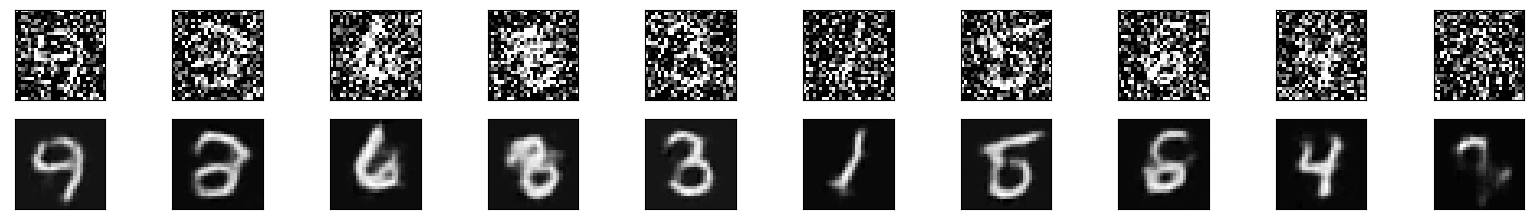

In [45]:
display(test_data_noisy, predictions)